In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from scipy.fft import fft

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

from tqdm.notebook import tqdm
from tqdm.keras import TqdmCallback

import features
import plots

2022-12-18 13:40:54.431185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 13:40:54.636729: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-18 13:40:54.636752: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-18 13:40:55.444904: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
c57bl6 = [
"BL601.smo.csv",
"BL602.smo.csv",
"BL606.smo.csv",
"BL609.smo.csv",
"BL610.smo.csv",
"BL611.smo.csv",
"BL612.smo.csv",
"BL614.smo.csv",
"BL616.smo.csv",
"BL6V1.smo.csv",
"BL6V2.smo.csv",
"BL6V3.smo.csv",
]

dba2 = [
"1D203.smo.csv",
"1D204.smo.csv",
"1D206.smo.csv",
"2D203.smo.csv",
"DBA10.smo.csv",
"DBA11.smo.csv",
"DBA12.smo.csv",
"DBA13.smo.csv",
"DBA14.smo.csv",
"DBA15.smo.csv",
]

bxd_f1 = [
"BDF02.smo.csv",
"BDF04.smo.csv",
"BDF06.smo.csv",
"BDF08.smo.csv",
"BDF09.smo.csv",
]

dxb_f1 = [
"DBF01.smo.csv",
"DBF02.smo.csv",
"DBF04.smo.csv",
"DBF05.smo.csv",
"DBF06.smo.csv",
"DBF07.smo.csv",
"DBFM3.smo.csv",
]

bxd_005 = [
"00501.smo.csv",
"00502.smo.csv",
"00503.smo.csv",
"00504.smo.csv",
"00505.smo.csv",
"00506.smo.csv",
]

bxd_029 = [
"02901.smo.csv",
"02902.smo.csv",
"02903.smo.csv",
"02905.smo.csv",
"02907.smo.csv",
"02908.smo.csv",
"02909.smo.csv",
"02910.smo.csv",
]

bxd_029_tlr4 = [
"29T01.smo.csv",
"29T05.smo.csv",
"29T06.smo.csv",
"29T08.smo.csv",
"29T09.smo.csv",
"29T10.smo.csv",
"29T11.smo.csv",
]

bxd_032 = [
"03201.smo.csv",
"03202.smo.csv",
"03204.smo.csv",
"03205.smo.csv",
"03206.smo.csv",
"03207.smo.csv",
"03208.smo.csv",
]

bxd_043 = [
"04304.smo.csv",
"04306.smo.csv",
"04307.smo.csv",
"04308.smo.csv",
"04309.smo.csv",
"04310.smo.csv",
"043S5.smo.csv",
]

bxd_044 = [
"04402.smo.csv",
"04403.smo.csv",
"04405.smo.csv",
"04406.smo.csv",
"04407.smo.csv",
]

bxd_045 = [
"04501.smo.csv",
"04502.smo.csv",
"04504.smo.csv",
"04505.smo.csv",
"04506.smo.csv",
"04508.smo.csv",
]

bxd_048 = [
"04801.smo.csv",
"04802.smo.csv",
"04803.smo.csv",
"04804.smo.csv",
"04805.smo.csv",
"04806.smo.csv",
]

bxd_049 = [
"04901.smo.csv",
"04902.smo.csv",
"04903.smo.csv",
"04905.smo.csv",
"04906.smo.csv",
"04907.smo.csv",
]

bxd_050 = [
"05001.smo.csv",
"05002.smo.csv",
"05003.smo.csv",
"05004.smo.csv",
]

bxd_051 = [
"05101.smo.csv",
"05102.smo.csv",
"05103.smo.csv",
"05107.smo.csv",
"05108.smo.csv",
"051G9.smo.csv",
"51G10.smo.csv",
]

bxd_055 = [
"05501.smo.csv",
"05502.smo.csv",
"05504.smo.csv",
"05505.smo.csv",
"05506.smo.csv",
]

bxd_056 = [
"05601.smo.csv",
"05602.smo.csv",
"05603.smo.csv",
"05604.smo.csv",
"05605.smo.csv",
"05606.smo.csv",
"05607.smo.csv",
]

bxd_061 = [
"06103.smo.csv",
"06105.smo.csv",
"06106.smo.csv",
"06109.smo.csv",
"06110.smo.csv",
"06111.smo.csv",
]

bxd_063 = [
"06302.smo.csv",
"06303.smo.csv",
"06304.smo.csv",
"06306.smo.csv",
"06307.smo.csv",
"06308.smo.csv",
]

bxd_064 = [
"06403.smo.csv",
"06404.smo.csv",
"06405.smo.csv",
"06407.smo.csv",
"06408.smo.csv",
"06410.smo.csv",
]

bxd_065 = [
"06501.smo.csv",
"06503.smo.csv",
"06504.smo.csv",
"06505.smo.csv",
"06506.smo.csv",
"06507.smo.csv",
]

bxd_066 = [
"06601.smo.csv",
"06603.smo.csv",
"06604.smo.csv",
"06605.smo.csv",
"06607.smo.csv",
"06608.smo.csv",
]

bxd_067 = [
"06702.smo.csv",
"06703.smo.csv",
"06704.smo.csv",
"06705.smo.csv",
"06706.smo.csv",
"06707.smo.csv",
]

bxd_070 = [
"07001.smo.csv",
"07004.smo.csv",
"07005.smo.csv",
"07006.smo.csv",
"07007.smo.csv",
]

bxd_071 = [
"07105.smo.csv",
"07106.smo.csv",
"07108.smo.csv",
"07109.smo.csv",
"071S2.smo.csv",
]

bxd_073 = [
"07301.smo.csv",
"07302.smo.csv",
"07303.smo.csv",
"07304.smo.csv",
"07305.smo.csv",
"07306.smo.csv",
]

bxd_075 = [
"07501.smo.csv",
"07502.smo.csv",
"07503.smo.csv",
"07504.smo.csv",
"07505.smo.csv",
"07507.smo.csv",
"075G8.smo.csv",
]

bxd_079 = [
"07901.smo.csv",
"07902.smo.csv",
]

bxd_081 = [
"08102.smo.csv",
"08103.smo.csv",
"08106.smo.csv",
"08108.smo.csv",
"08112.smo.csv",
"08113.smo.csv",
]

bxd_083 = [
"08305.smo.csv",
"08306.smo.csv",
"08311.smo.csv",
"08312.smo.csv",
"08313.smo.csv",
"08314.smo.csv",
]

bxd_084 = [
"08401.smo.csv",
"08403.smo.csv",
"08404.smo.csv",
"08405.smo.csv",
"08406.smo.csv",
]

bxd_085 = [
"08501.smo.csv",
"08502.smo.csv",
"08503.smo.csv",
]

bxd_087 = [
"08701.smo.csv",
"08705.smo.csv",
"08706.smo.csv",
"08707.smo.csv",
"08709.smo.csv",
"08710.smo.csv",
]

bxd_089 = [
"08901.smo.csv",
"08902.smo.csv",
"08903.smo.csv",
"08904.smo.csv",
"08910.smo.csv",
"08911.smo.csv",
]

bxd_090 = [
"09001.smo.csv",
"09003.smo.csv",
"09004.smo.csv",
"09005.smo.csv",
"09006.smo.csv",
"09007.smo.csv",
]

bxd_095 = [
"09501.smo.csv",
"09503.smo.csv",
"09504.smo.csv",
"09505.smo.csv",
"09506.smo.csv",
"09508.smo.csv",
"09509.smo.csv",
]

bxd_096 = [
"09601.smo.csv",
"09602.smo.csv",
"09604.smo.csv",
"09605.smo.csv",
"09606.smo.csv",
"09607.smo.csv",
"09608.smo.csv",
]

bxd_097 = [
"09701.smo.csv",
"09702.smo.csv",
"09703.smo.csv",
"09706.smo.csv",
"09708.smo.csv",
"09709.smo.csv",
]

bxd_098 = [
"09801.smo.csv",
"09802.smo.csv",
"09803.smo.csv",
"09806.smo.csv",
"09807.smo.csv",
"09808.smo.csv",
]

bxd_100 =[
"10002.smo.csv",
"10003.smo.csv",
"10004.smo.csv",
"10006.smo.csv",
"10008.smo.csv",
"10009.smo.csv",
"10010.smo.csv",
]

bxd_101 =[
"10101.smo.csv",
"10102.smo.csv",
]

bxd_103 =[
"10301.smo.csv",
"10302.smo.csv",
"10303.smo.csv",
"10304.smo.csv",
"10306.smo.csv",
"10307.smo.csv",
]

In [5]:
data_folder = 'data/csv/'
data_files = ['10101.smo.csv', '1D203.smo.csv', '1D204.smo.csv', '1D206.smo.csv', '2D203.smo.csv', '29T01.smo.csv', '29T05.smo.csv', '29T06.smo.csv', '29T08.smo.csv']

useRaw = False
test_size = 0.3
seed = 13
window_sizes = [2, 5, 10, 50, 100]
days = [0, 1, 2, 3]
cat_matrix = True # True for neural net, any for random forest
window_features = ["EEGv", "EMGv"]

In [6]:
df = pd.DataFrame()

for file in data_files:
    df_temp = features.load_features(data_folder + file)
    window_names = []

    for window_size in window_sizes:
        df_temp = features.features_window(df_temp, window_size=window_size, op=features.WindowOperationFlag.MEAN, features=window_features)
        df_temp = features.features_window(df_temp, window_size=window_size, op=features.WindowOperationFlag.VAR, features=window_features)

        for feature in window_features:
            window_names.append(feature + "_mean" + str(window_size))
            window_names.append(feature + "_var" + str(window_size))

    df_temp = features.log_features(df_temp, ["EEGv", "EMGv"] + window_names)

    df_temp = df_temp.dropna()
    df_temp = features.add_times(df_temp)
    df_temp = features.filter_days(df_temp, days)

    df = pd.concat([df, df_temp])

skeep, _ = features.states(useRaw)

/home/matt989253/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matt989253/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matt989253/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matt989253/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matt989253/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matt989253/anaconda3/lib/python3.9/site-packages/pandas/cor

In [8]:
x_train, x_test, y_train, y_test, le = features.split_data(df1, useRaw, test_size, seed, cat_matrix)

# Random Forest

[[11286   492   133]
 [ 1346 10298   237]
 [  973   402 10502]]
              precision    recall  f1-score   support

           n       0.83      0.95      0.88     11911
           r       0.92      0.87      0.89     11881
           w       0.97      0.88      0.92     11877

    accuracy                           0.90     35669
   macro avg       0.91      0.90      0.90     35669
weighted avg       0.91      0.90      0.90     35669



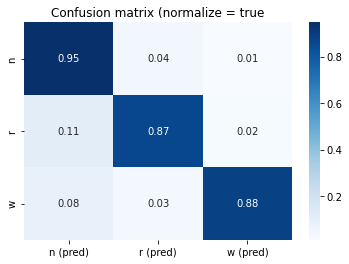

"Score": 0.8765875129664414


In [9]:
rfc = RandomForestClassifier(random_state=seed)
rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_test)

plots.plot_confusion(model=rfc, x_test=x_test, y_test=y_test, le=le, cat_matrix=cat_matrix, normalize='true')
print(f'\"Score\": {rfc.score(x_test, y_test)}')

# Neural Network

In [16]:
def baseline_model(input_dim, num_classes, lr=0.0001):
    model = Sequential()
    model.add(Dense(3, input_dim=input_dim, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

    return model

model = baseline_model(x_train.shape[1], le.classes_.size)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 1338      
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
Total params: 1,350
Trainable params: 1,350
Non-trainable params: 0
_________________________________________________________________


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

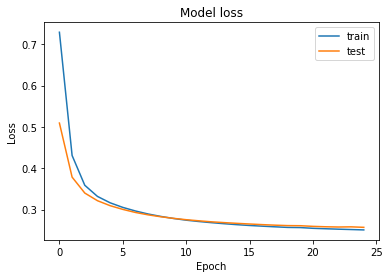

In [17]:
history = model.fit(x=x_train,
                    y=y_train,
                    validation_data=(x_test, y_test),
                    epochs=25,
                    batch_size=50,
                    verbose=0,
                    callbacks=[TqdmCallback(verbose=1)]
                )

plots.plot_loss(history.history)

1115/1115 [==============================] - 2s 1ms/step
[[10870   747   294]
 [  720 10693   468]
 [  405   643 10829]]
              precision    recall  f1-score   support

           n       0.91      0.91      0.91     11911
           r       0.88      0.90      0.89     11881
           w       0.93      0.91      0.92     11877

    accuracy                           0.91     35669
   macro avg       0.91      0.91      0.91     35669
weighted avg       0.91      0.91      0.91     35669



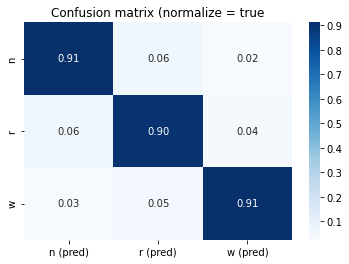

In [18]:
plots.plot_confusion(model=model, x_test=x_test, y_test=y_test, le=le, cat_matrix=True, normalize='true')